<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/M%C3%A9todo_Sim%C3%A9trico_Var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO SIMÉTRICO VARIACIONAL
**EDP II**

**Jessica Beatriz Arcos Gutiérrez**

---

**Descripción:**

Resuelve la ecuación:
$${\frac{d^2 u}{dx^2} + u = x^2 }$$

con condiciones:
- **Condiciones:** \
a) $u(0) = u(1) = 0$\
b) $u(0) = 0, u´(1) = 1$
- **Dominio:** $0 \leq x \leq 1$
---
El método variacional simétrico transforma ecuaciones diferenciales en problemas de minimización mediante formulación débil.

### **Procedimiento:**

Para resolver la ecuación $ u'' + u = x^2 $ con condiciones de frontera dadas, primero vamos a multiplicar por función base v(x)  e integramos por partes:
  $ \int_0^1 (u'' + u - x^2) v \, dx = 0$
   
  Así  $\int_0^1 (-u'v' + uv) \, dx = \int_0^1 x^2 v \, dx$

   Elegimos $\beta_j(x) = x^j(1-x)$ que cumplen condiciones de frontera homogéneas. Expresamos la solución como:
   $u_N(x) = \sum_{j=1}^N \alpha_j \beta_j(x)$
   Sustituyendo obtenemos $K\alpha = F$ dónde:  \
$ K_{ij} = \int_0^1 (-\beta_i'\beta_j' + \beta_i\beta_j) \, dx$\
   $F_i = \int_0^1 x^2 \beta_i \, dx$
  
  
   Finalmente resolvemos para $\alpha$ y reconstruimos $u_N(x)$.

Nota: Este método converge a la solución exacta al aumentar \( N \).

In [89]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [90]:
x = sp.symbols('x')
u = sp.Function('u')

In [91]:
ode = u(x).diff(x, 2) + u(x) - x**2
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x**2 - 2)

In [92]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

In [93]:
sol

Eq(u(x), x**2 + (1 - 2*cos(1))*sin(x)/sin(1) + 2*cos(x) - 2)

In [94]:
u_exacta_c1 = sp.lambdify(x, sol.rhs, "numpy")

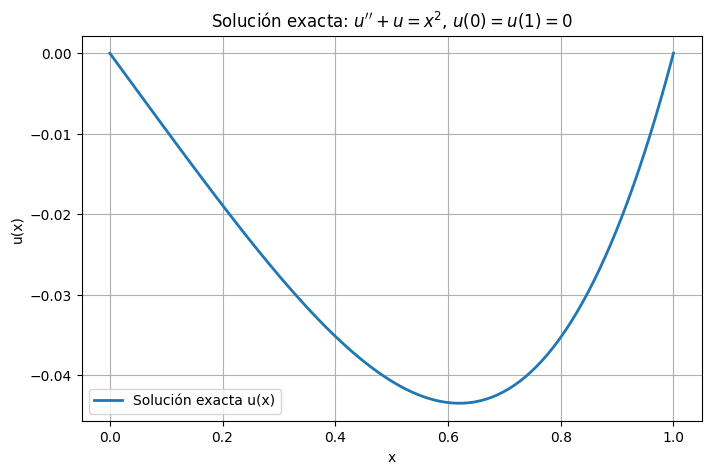

In [95]:
xx = np.linspace(0, 1, 100)
yy = u_exacta_c1(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución exacta u(x)", linewidth=2)
plt.title(r"Solución exacta: $u'' + u = x^2$, $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [96]:
beta1 = x*(1-x) # Función base

In [97]:
beta1_deriv = sp.diff(beta1, x) # Derivada de beta 1

In [98]:
K11 = sp.integrate(-beta1_deriv*beta1_deriv + beta1*beta1, (x, 0, 1))

In [99]:
F1 = sp.integrate(x**2 * beta1, (x, 0, 1))

In [100]:
alpha1_sym = sp.symbols('alpha1')
sol_alpha1 = sp.solve(sp.Eq(K11*alpha1_sym, F1), alpha1_sym)
alpha1_val = sol_alpha1[0]

In [101]:
u1 = alpha1_val * beta1

In [102]:
u1

-x*(1 - x)/6

N=2

In [103]:
beta2 = x**2*(1-x)

In [104]:
beta2_deriv = sp.diff(beta2, x)

In [105]:
K11 = sp.integrate(-beta1_deriv*beta1_deriv + beta1*beta1, (x, 0, 1))
K12 = sp.integrate(-beta1_deriv*beta2_deriv + beta1*beta2, (x, 0, 1))
K22 = sp.integrate(-beta2_deriv*beta2_deriv + beta2*beta2, (x, 0, 1))

In [106]:
F1 = sp.integrate(x**2 * beta1, (x, 0, 1)) + beta1.subs(x, 1)*1
F2 = sp.integrate(x**2 * beta2, (x, 0, 1)) + beta2.subs(x, 1)*1

In [107]:
alpha1, alpha2 = sp.symbols('alpha1 alpha2')

In [108]:
sol = sp.solve([
    sp.Eq(K11*alpha1 + K12*alpha2, F1),
    sp.Eq(K12*alpha1 + K22*alpha2, F2)
], [alpha1, alpha2])

In [109]:
alpha1_val = sol[alpha1]
alpha2_val = sol[alpha2]

In [110]:
u2_c2 = alpha1_val*beta1 + alpha2_val*beta2
u2_c2_simp = sp.simplify(u2_c2)

In [111]:
u2_c2_simp

x*(x - 1)*(21*x + 10)/123

N=3

In [112]:
beta3 = x**3*(1-x)

In [113]:
beta3_deriv = sp.diff(beta3, x)

In [114]:
K11 = sp.integrate(-beta1_deriv*beta1_deriv + beta1*beta1, (x, 0, 1))
K12 = sp.integrate(-beta1_deriv*beta2_deriv + beta1*beta2, (x, 0, 1))
K13 = sp.integrate(-beta1_deriv*beta3_deriv + beta1*beta3, (x, 0, 1))
K22 = sp.integrate(-beta2_deriv*beta2_deriv + beta2*beta2, (x, 0, 1))
K23 = sp.integrate(-beta2_deriv*beta3_deriv + beta2*beta3, (x, 0, 1))
K33 = sp.integrate(-beta3_deriv*beta3_deriv + beta3*beta3, (x, 0, 1))

In [115]:
K11

-3/10

In [116]:
K12

-3/20

In [117]:
K13

-19/210

In [118]:
K22

-13/105

In [119]:
K23

-79/840

In [120]:
K33

-103/1260

In [121]:
F1 = sp.integrate(x**2 * beta1, (x, 0, 1))
F2 = sp.integrate(x**2 * beta2, (x, 0, 1))
F3 = sp.integrate(x**2 * beta3, (x, 0, 1))

In [122]:
F1

1/20

In [123]:
F2

1/30

In [124]:
F3

1/42

In [125]:
alpha1, alpha2, alpha3 = sp.symbols('alpha1 alpha2 alpha3')

In [126]:
sol = sp.solve([
    sp.Eq(K11*alpha1 + K12*alpha2 + K13*alpha3, F1),
    sp.Eq(K12*alpha1 + K22*alpha2 + K23*alpha3, F2),
    sp.Eq(K13*alpha1 + K23*alpha2 + K33*alpha3, F3)
], [alpha1, alpha2, alpha3])

In [127]:
alpha1_val = sol[alpha1]
alpha2_val = sol[alpha2]
alpha3_val = sol[alpha3]

In [128]:
u3 = alpha1_val*beta1 + alpha2_val*beta2 + alpha3_val*beta3
u3_simp = sp.simplify(u3)

In [129]:
u3_simp

x*(x - 1)*(1722*x**2 + 2464*x + 2335)/24518

In [130]:
u3_num = sp.lambdify(x, u3_simp, "numpy")

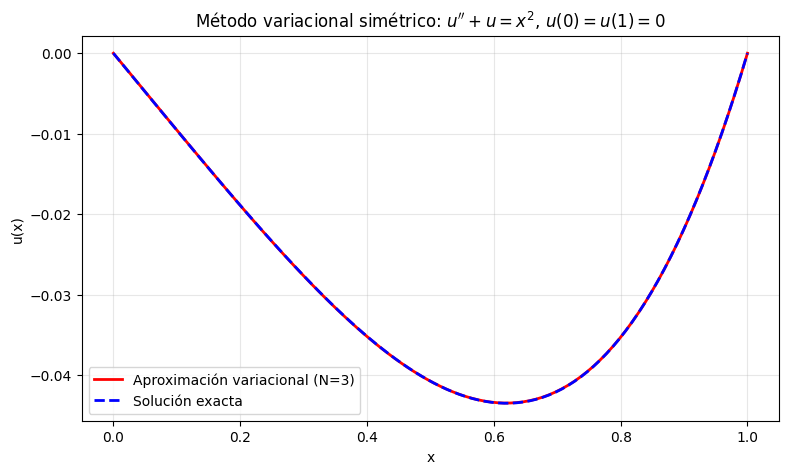

In [131]:
# Puntos para graficar
xx = np.linspace(0, 1, 100)
yy_exacta_c1 = u_exacta_c1(xx)

# Tu aproximación variacional (N=3)
yy_aprox_c1 = u3_num(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, yy_aprox_c1, 'r-', label="Aproximación variacional (N=3)", linewidth=2)
plt.plot(xx, yy_exacta_c1, 'b--', label="Solución exacta", linewidth=2)

plt.title(r"Método variacional simétrico: $u'' + u = x^2$, $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

CASO 2

In [132]:
theta1 = x #Función base

In [133]:
theta1_deriv = sp.diff(theta1, x)

In [134]:
K11 = sp.integrate(-theta1_deriv*theta1_deriv + theta1*theta1, (x, 0, 1))

In [135]:
F1 = sp.integrate(x**2 * theta1, (x, 0, 1)) - 1

In [136]:
a1 = sp.symbols('a1')

In [137]:
sol = sp.solve(sp.Eq(K11*a1, F1), a1)

In [138]:
a1_val = sol[0]

In [139]:
u1_c2 = a1_val * theta1

In [140]:
u1_c2

9*x/8

N=2

In [141]:
theta2 = x**2

In [142]:
theta2_deriv = sp.diff(theta2, x)

In [143]:
K11 = sp.integrate(-theta1_deriv*theta1_deriv + theta1*theta1, (x, 0, 1))
K12 = sp.integrate(-theta1_deriv*theta2_deriv + theta1*theta2, (x, 0, 1))
K22 = sp.integrate(-theta2_deriv*theta2_deriv + theta2*theta2, (x, 0, 1))

In [144]:
F1 = sp.integrate(x**2 * theta1, (x, 0, 1)) - 1
F2 = sp.integrate(x**2 * theta2, (x, 0, 1)) - 1

In [145]:
a1, a2 = sp.symbols('a1 a2')

In [146]:
sol = sp.solve([
    sp.Eq(K11*a1 + K12*a2, F1),
    sp.Eq(K12*a1 + K22*a2, F2)
], [a1, a2])

In [147]:
a1_val = sol[a1]
a2_val = sol[a2]

In [148]:
u2_c2 = a1_val*theta1 + a2_val*theta2

In [149]:
u2_c2

-21*x**2/139 + 180*x/139

N=3

In [150]:
theta3 = x**3

In [151]:
theta3_deriv = sp.diff(theta3, x)

In [152]:
K11 = sp.integrate(-theta1_deriv*theta1_deriv + theta1*theta1, (x, 0, 1))
K12 = sp.integrate(-theta1_deriv*theta2_deriv + theta1*theta2, (x, 0, 1))
K13 = sp.integrate(-theta1_deriv*theta3_deriv + theta1*theta3, (x, 0, 1))
K22 = sp.integrate(-theta2_deriv*theta2_deriv + theta2*theta2, (x, 0, 1))
K23 = sp.integrate(-theta2_deriv*theta3_deriv + theta2*theta3, (x, 0, 1))
K33 = sp.integrate(-theta3_deriv*theta3_deriv + theta3*theta3, (x, 0, 1))

In [153]:
K11

-2/3

In [154]:
K12

-3/4

In [155]:
K13

-4/5

In [156]:
K22

-17/15

In [157]:
K23

-4/3

In [158]:
K33

-58/35

In [159]:
F1 = sp.integrate(x**2 * theta1, (x, 0, 1)) - 1
F2 = sp.integrate(x**2 * theta2, (x, 0, 1)) - 1
F3 = sp.integrate(x**2 * theta3, (x, 0, 1)) - 1

In [160]:
F1

-3/4

In [161]:
F2

-4/5

In [162]:
F3

-5/6

In [163]:
a1, a2, a3 = sp.symbols('a1 a2 a3')

In [164]:
sol = sp.solve([
    sp.Eq(K11*a1 + K12*a2 + K13*a3, F1),
    sp.Eq(K12*a1 + K22*a2 + K23*a3, F2),
    sp.Eq(K13*a1 + K23*a2 + K33*a3, F3)
], [a1, a2, a3])

In [165]:
a1_val = sol[a1]
a2_val = sol[a2]
a3_val = sol[a3]

In [166]:
u3_c2 = a1_val*theta1 + a2_val*theta2 + a3_val*theta3

In [167]:
u3_c2_num = sp.lambdify(x, sp.simplify(u3_c2), "numpy")

In [168]:
u3_c2

-175*x**3/7108 - 203*x**2/1777 + 2280*x/1777

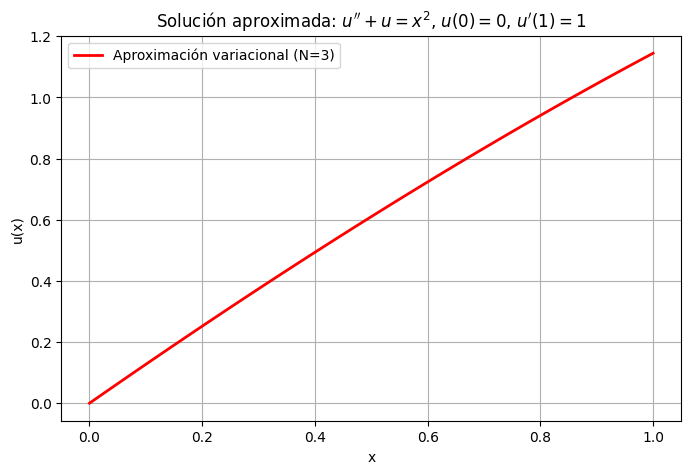

In [169]:
# Gráfica Caso 2
xx = np.linspace(0, 1, 100)

yy_aprox_c2 = u3_c2_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy_aprox_c2, 'r-', label="Aproximación variacional (N=3)", linewidth=2)

plt.title(r"Solución aproximada: $u'' + u = x^2$, $u(0)=0$, $u'(1)=1$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [170]:
from tabulate import tabulate

In [171]:
print("="*70)
print("MÉTODO VARIACIONAL SIMÉTRICO - CASO 1: u(0)=u(1)=0")
print("="*70)
puntos = [0.0, 0.25, 0.5, 0.75, 1.0]
datos_caso1 = []

for xi in puntos:
    if xi == 0.0 or xi == 1.0:
        exacta = 0.0
        aprox = 0.0
    else:
        exacta = u_exacta_c1(xi)  # <- Cambié u_exacta_c1
        aprox = u3_num(xi)     # <- Cambié u3_num por u3_c1_num

    error = abs(exacta - aprox)
    datos_caso1.append([xi, exacta, aprox, error])

headers1 = ["x", "Solución Exacta", "Aproximada (N=3)", "Error Absoluto"]
print(tabulate(datos_caso1, headers=headers1, tablefmt="grid", floatfmt=".6f"))


MÉTODO VARIACIONAL SIMÉTRICO - CASO 1: u(0)=u(1)=0
+----------+-------------------+--------------------+------------------+
|        x |   Solución Exacta |   Aproximada (N=3) |   Error Absoluto |
+==========+===================+====================+==================+
| 0.000000 |          0.000000 |           0.000000 |         0.000000 |
+----------+-------------------+--------------------+------------------+
| 0.250000 |         -0.023374 |          -0.023391 |         0.000017 |
+----------+-------------------+--------------------+------------------+
| 0.500000 |         -0.040759 |          -0.040761 |         0.000002 |
+----------+-------------------+--------------------+------------------+
| 0.750000 |         -0.039417 |          -0.039397 |         0.000020 |
+----------+-------------------+--------------------+------------------+
| 1.000000 |          0.000000 |           0.000000 |         0.000000 |
+----------+-------------------+--------------------+------------------+


In [172]:
print("\n" + "="*70)
print("MÉTODO VARIACIONAL SIMÉTRICO - CASO 2: u(0)=0, u'(1)=1")
print("="*70)

datos_caso2 = []
for xi in puntos:
    if xi == 0.0:
        aprox = 0.0
    else:
        aprox = u3_c2_num(xi)  # <- Función del Caso 2

    datos_caso2.append([xi, aprox])

headers2 = ["x", "Aproximada (N=3)"]
print(tabulate(datos_caso2, headers=headers2, tablefmt="grid", floatfmt=".6f"))


MÉTODO VARIACIONAL SIMÉTRICO - CASO 2: u(0)=0, u'(1)=1
+----------+--------------------+
|        x |   Aproximada (N=3) |
+==========+====================+
| 0.000000 |           0.000000 |
+----------+--------------------+
| 0.250000 |           0.313241 |
+----------+--------------------+
| 0.500000 |           0.609894 |
+----------+--------------------+
| 0.750000 |           0.887651 |
+----------+--------------------+
| 1.000000 |           1.144204 |
+----------+--------------------+
